In [29]:
import cv2
import os
import random
import numpy as np

# Path to the directory containing the image folders on Google Drive
# base_path = "/content/drive/My Drive/archive"

base_path = "/Users/mrbinit/Downloads/preprocessed/"

# List to store all image file paths and corresponding labels
image_paths = []
labels = []

# Function to recursively find all image files in a directory and assign labels
def find_image_files(directory, label):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check for image file formats
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                image_paths.append(os.path.join(root, file))
                labels.append(label)  # Assign label to the corresponding image

# Find image files in the 'fake-v2' folder
fake_v2_path = os.path.join(base_path, "fake")
find_image_files(fake_v2_path, label=1)  # Assign label 1 for AI-generated images

# Find image files in the 'real' folder
real_path = os.path.join(base_path, "real")
find_image_files(real_path, label=0)  # Assign label 0 for hand-made images

# Shuffle the image paths and labels in parallel
combined_data = list(zip(image_paths, labels))
random.shuffle(combined_data)
image_paths, labels = zip(*combined_data)

# Convert labels to numpy array for easier handling
labels = np.array(labels)

# Display the number of images and labels loaded
print(f"Total images: {len(image_paths)}")
print(f"Total labels: {len(labels)}")



Total images: 7560
Total labels: 7560


In [30]:
# Function to check dimensions (height and width) of an image
def get_image_dimensions(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    # To get the height, width and channels 
    height, width, channels = image.shape  #channels shows 3 color Red, blue, green (indicates color image) 
    return height, width, channels

# Randomly select 5 images for dimension display
num_images_to_display = 5
selected_image_paths = random.sample(image_paths, num_images_to_display)

# show of 5 images selected randomly 
for image_path in selected_image_paths:
    height, width, channels = get_image_dimensions(image_path)
    print(f"Height: {height} pixels")
    print(f"Width: {width} pixels")
    print(f"Number of Channels: {channels}")
    print()


Height: 2036 pixels
Width: 3050 pixels
Number of Channels: 3

Height: 1024 pixels
Width: 1024 pixels
Number of Channels: 3

Height: 1080 pixels
Width: 1080 pixels
Number of Channels: 3

Height: 224 pixels
Width: 224 pixels
Number of Channels: 3

Height: 1200 pixels
Width: 960 pixels
Number of Channels: 3



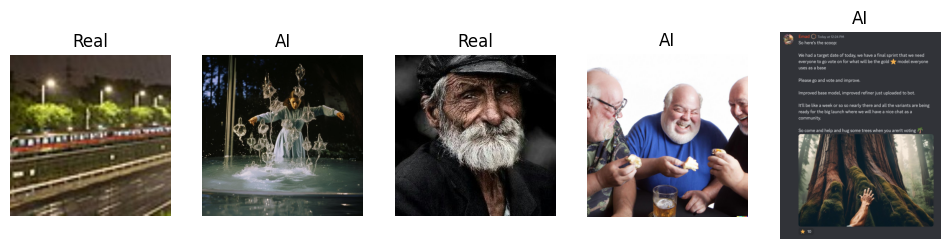

In [35]:
import matplotlib.pyplot as plt
# Function to display a random subset of images with labels
def display_images(image_paths, labels, num_images= 5):
    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        # Randomly select an image index
        idx = random.randint(0, len(image_paths) - 1)
        image_path = image_paths[idx]
        label = labels[idx]
        
        # Load and display the image using OpenCV
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title("AI" if label == 1 else "Real")  # Display label
        plt.axis("off")
    plt.show()

# Display a random subset of images with their labels
num_images_to_display = 5
display_images(image_paths, labels, num_images=num_images_to_display)

In [32]:
import tensorflow as tf
import numpy 
img_augmentation_layers = [
    tf.keras.layers.RandomRotation(factor = 0.15),
    tf.keras.layers.RandomTranslation(height_factor = 0.1, width_factor = 0.1),
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomContrast(factor = 0.1),
]

def apply_image_augmentation(image):
    #convert image to tensorflow tensor
    image = tf.convert_to_tensor(image) # converting the input image to  tensor for compatibility wiht tensorflow operation and could be processed efficiently with tnesorflow API
    
    #apply each augmentation layer sequentially
    for layer in img_augmentation_layers:
        image = layer(image)
    #convert back to numpy array
    augmented_image = image.numpy() 
    return augmented_image

Note: In the uint8 format, pixel values range from 0 to 255, representing the full range of possible color intensities for each channel (0 for minimum intensity, 255 for maximum intensity).

In [33]:
from tensorflow.keras.applications.efficientnet import preprocess_input

# Function to load and preprocess an image using EfficientNetB4's preprocess_input
def load_and_preprocess_image(image_path, label):
    # Read and preprocess the image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, (380, 380))  # Resize to match EfficientNetB4 input size
    image = preprocess_input(image)  # Preprocess input for EfficientNetB4
    return image, label

the key steps in preprocess input efficientNetb4 :
1. Normalization (centered around zero (mean subtraction) and scales them by dividing by the standard deviation.)
2. Mean subtraction (This helps in centering the pixel values around zero, which is important for training stability and convergence)
3. Channel ordering as EfficientNetB4 inputimages in RGB(Red-Green-Blue) . If the input image is in BGR (Blue-Green-Red) format (common with images loaded using OpenCV), the function performs the necessary conversion to RGB.

4. Scaling (The pixel values are scaled based on the standard deviation computed from the ImageNet dataset.). This step ensures that the input image data falls within a reasonable range that is suitable for the EfficientNetB4 model.


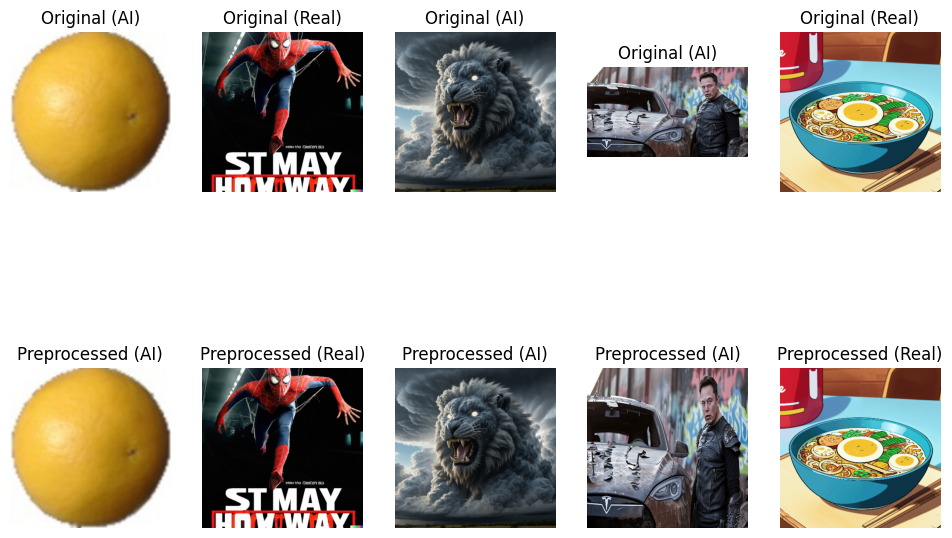

In [34]:
# Randomly select 5 images for display
num_images_to_display = 5
selected_image_paths = random.sample(image_paths, num_images_to_display)

# Display original and augmented images
plt.figure(figsize=(12, 8))
for i, image_path in enumerate(selected_image_paths):
    # Load and preprocess the image
    image, label = load_and_preprocess_image(image_path, labels[i])
    
    # Plot the original image
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))  # Display original image
    plt.title("Original" + (" (AI)" if label == 1 else " (Real)"))
    plt.axis("off")
    
    # Plot the preprocessed image
    plt.subplot(2, num_images_to_display, num_images_to_display + i + 1)
    plt.imshow(image)  # Display preprocessed image
    plt.title("Preprocessed" + (" (AI)" if label == 1 else " (Real)"))
    plt.axis("off")

plt.show()
